# Token Release Schedule Calculator with Token Amounts

This notebook calculates token releases over months with:

- Initial unlock percentage and token amount
- Linear unlock of remaining tokens over lock duration months
- Outputs both percentages and token amounts released and cumulative

You can customize:

- Total token supply
- Initial unlock %
- Lock duration (months)


Import Relevant Libraries for this Operation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [5]:
# Parameters - customize these

total_tokens = 756.84     # Total number of tokens (e.g., 1 million)
initial_unlock_percent = 25   # Initial unlocked tokens (%) at month 0
lock_duration_months = 6      # Months over which remaining tokens unlock linearly

remaining_percent = 100 - initial_unlock_percent
remaining_tokens = total_tokens * (remaining_percent / 100)
initial_tokens = total_tokens * (initial_unlock_percent / 100)


### Calculate monthly token releases (percentage and absolute amounts)


In [6]:
schedule = []

# Month 0
schedule.append({
    'Month': 0,
    'Tokens Released (%)': initial_unlock_percent,
    'Tokens Released (amount)': initial_tokens,
    'Cumulative Release (%)': initial_unlock_percent,
    'Cumulative Release (amount)': initial_tokens
})

# Tokens released linearly per month in amount and %
linear_unlock_percent_per_month = remaining_percent / lock_duration_months
linear_unlock_tokens_per_month = remaining_tokens / lock_duration_months

for month in range(1, lock_duration_months + 1):
    released_percent = linear_unlock_percent_per_month
    released_tokens = linear_unlock_tokens_per_month
    
    cumulative_percent = initial_unlock_percent + linear_unlock_percent_per_month * month
    cumulative_tokens = initial_tokens + linear_unlock_tokens_per_month * month
    
    # Ensure cumulative does not exceed 100% or total tokens
    cumulative_percent = min(cumulative_percent, 100)
    cumulative_tokens = min(cumulative_tokens, total_tokens)
    
    schedule.append({
        'Month': month,
        'Tokens Released (%)': released_percent,
        'Tokens Released (amount)': released_tokens,
        'Cumulative Release (%)': cumulative_percent,
        'Cumulative Release (amount)': cumulative_tokens
    })

df_schedule = pd.DataFrame(schedule)
df_schedule


,Month,Tokens Released (%),Tokens Released (amount),Cumulative Release (%),Cumulative Release (amount)
0,0,25.0,189.210,25.0,189.210
1,1,12.5,94.605,37.5,283.815
2,2,12.5,94.605,50.0,378.420
3,3,12.5,94.605,62.5,473.025
4,4,12.5,94.605,75.0,567.630
5,5,12.5,94.605,87.5,662.235
6,6,12.5,94.605,100.0,756.840


### Plot Tokens Released and Cumulative Release

Both in percentage and absolute token amounts.


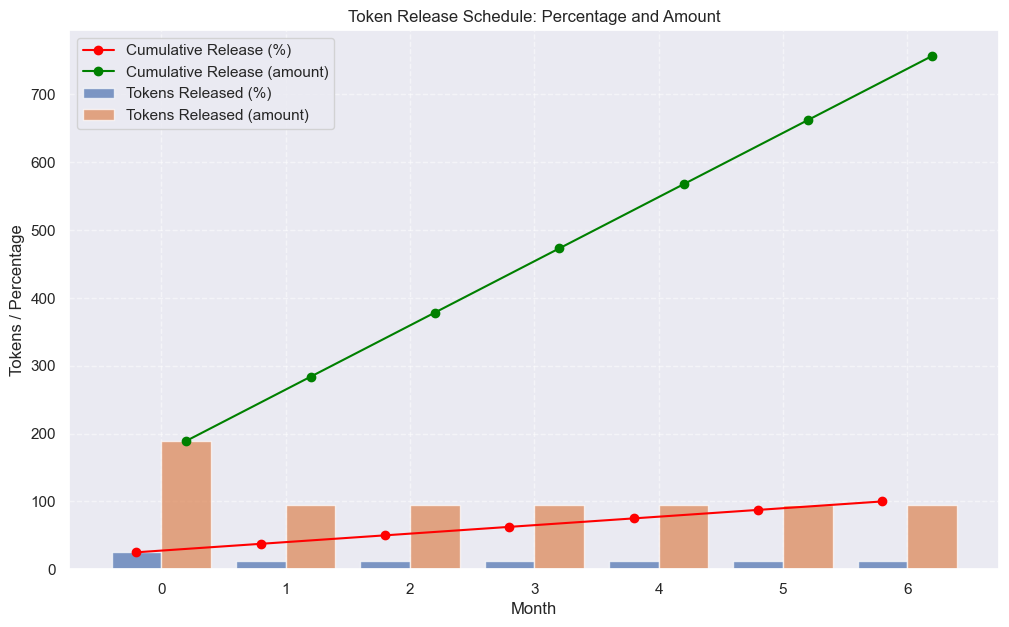

In [4]:
plt.figure(figsize=(12, 7))

# Percentage tokens released bar plot
plt.bar(df_schedule['Month'] - 0.2, df_schedule['Tokens Released (%)'], width=0.4, alpha=0.7, label='Tokens Released (%)')

# Cumulative percentage release line plot
plt.plot(df_schedule['Month'] - 0.2, df_schedule['Cumulative Release (%)'], color='red', marker='o', label='Cumulative Release (%)')

# Token amount released bar plot (side by side)
plt.bar(df_schedule['Month'] + 0.2, df_schedule['Tokens Released (amount)'], width=0.4, alpha=0.7, label='Tokens Released (amount)')

# Cumulative token amount release line plot
plt.plot(df_schedule['Month'] + 0.2, df_schedule['Cumulative Release (amount)'], color='green', marker='o', label='Cumulative Release (amount)')

plt.xlabel('Month')
plt.ylabel('Tokens / Percentage')
plt.title('Token Release Schedule: Percentage and Amount')
plt.xticks(df_schedule['Month'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
